# Project on Data Analysis, Preprocessing, EDA, Visualization etc. on FIFA Dataset using Python Libraries - Group Assignment by G2B3 due by 11Feb'24:
------------------------------
## Task (T) - Load and explore data

### T1 - Importing the required libraries and read the dataset

In [1]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import plotly
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
print('modules are imported')

modules are imported


In [2]:
try:
    df_gl = pd.read_csv('./fifa.csv')
except Exception as e:
    print(f"Error: {e}")
else:
    print("file read with no error exceptions raised.")

file read with no error exceptions raised.


### T2 - Familiarization by getting to know the dataset shape, info etc.

In [4]:
df_gl.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df_gl.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [7]:
df_gl.shape

(18207, 60)

In [8]:
df_gl.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [9]:
df_gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

### T3 - Droping the columns which are redundant for the analysis like 'Photo','Flag','Club Logo' etc.

In [9]:
""" # List of redundant columns
redundant_columns = ['id', 'Photo', 'flag', 'Club Logo', 'Body Type', 'Jersey Number', 'Loaned From']

try:
    # Droping the redundant columns
    df_gl = df_gl.drop(columns=redundant_columns)
except KeyError as e:
    print(f"Error: {e}") """

Error: "['id', 'flag'] not found in axis"


In [10]:
# List of redundant columns
redundant_columns = ['ID', 'Photo', 'Flag', 'Club Logo', 'Body Type', 'Jersey Number', 'Loaned From']

try:
    # Droping the redundant columns
    df_gl = df_gl.drop(columns=redundant_columns)
    print("These columns dropped successfully")
except KeyError as e:
    print(f"Error: {e}")
    

These columns dropped successfully


## Task - Data Cleaning and Preprocessing

### T4 - Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix. 
### - Note: When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000
### - When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000

In [11]:
columns = ['Value', 'Wage', 'Release Clause']
total_records = len(df_gl[columns])
null_records = df_gl[columns].isnull().sum()
data_type = df_gl[columns].dtypes

print(f"Total records: {total_records}")
print(f"Null records:\n{null_records}")
print(f"Data type of:\n{data_type}")

Total records: 18207
Null records:
Value                0
Wage                 0
Release Clause    1564
dtype: int64
Data type of:
Value             object
Wage              object
Release Clause    object
dtype: object


In [12]:
df_gl.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
def convert_value(value):
    if isinstance(value, str):
        out = value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in out:
            out = float(out.replace('K', ''))*1000
        return out
    return value

try:
    df_gl['Value'] = df_gl['Value'].apply(convert_value).astype(float)
    df_gl['Wage'] = df_gl['Wage'].apply(convert_value).astype(float)
    df_gl['Release Clause'] = df_gl['Release Clause'].apply(convert_value).astype(float)
    print("Value, Wage and Release Clause columns converted successfully")
except Exception as e:
    print(f"Error: {e}")

Value, Wage and Release Clause columns converted successfully


In [14]:
df_gl.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [15]:
columns = ['Value', 'Wage', 'Release Clause']
total_records = len(df_gl[columns])
null_records = df_gl[columns].isnull().sum()
data_type = df_gl[columns].dtypes

print(f"Total records: {total_records}")
print(f"Null records:\n{null_records}")
print(f"Data type of:\n{data_type}")

Total records: 18207
Null records:
Value                0
Wage                 0
Release Clause    1564
dtype: int64
Data type of:
Value             float64
Wage              float64
Release Clause    float64
dtype: object


### T5. Convert the column "Joined" into integer data type with keeping only the year

In [16]:
total_records = len(df_gl['Joined'])
null_records = df_gl['Joined'].isnull().sum()
data_type = df_gl['Joined'].dtype

print(f"Total records in 'Joined': {total_records}")
print(f"Null records in 'Joined': {null_records}")
print(f"Data type of 'Joined': {data_type}")

Total records in 'Joined': 18207
Null records in 'Joined': 1553
Data type of 'Joined': object


In [17]:
df_gl[['Name', 'Joined', 'Nationality', 'Value', 'Wage', 'Release Clause']].head(4)

,Name,Joined,Nationality,Value,Wage,Release Clause
0,L. Messi,"Jul 1, 2004",Argentina,110500000.0,565000.0,226500000.0
1,Cristiano Ronaldo,"Jul 10, 2018",Portugal,77000000.0,405000.0,127100000.0
2,Neymar Jr,"Aug 3, 2017",Brazil,118500000.0,290000.0,228100000.0
3,De Gea,"Jul 1, 2011",Spain,72000000.0,260000.0,138600000.0


In [18]:
try:
    df_gl['Joined'] = pd.to_datetime(df_gl['Joined'], format='%b %d, %Y').dt.year
    df_gl['Joined'] = df_gl['Joined'].fillna(0).astype(int)
    print("Joined column converted successfully")
except Exception as e:
    print(f"Error: {e}")

Joined column converted successfully


In [19]:
df_gl[['Name', 'Joined', 'Nationality', 'Value', 'Wage', 'Release Clause']].head(4)

,Name,Joined,Nationality,Value,Wage,Release Clause
0,L. Messi,2004,Argentina,110500000.0,565000.0,226500000.0
1,Cristiano Ronaldo,2018,Portugal,77000000.0,405000.0,127100000.0
2,Neymar Jr,2017,Brazil,118500000.0,290000.0,228100000.0
3,De Gea,2011,Spain,72000000.0,260000.0,138600000.0


In [20]:
total_records = len(df_gl['Joined'])
null_records = df_gl['Joined'].isnull().sum()
data_type = df_gl['Joined'].dtype

print(f"Total records in 'Joined': {total_records}")
print(f"Null records in 'Joined': {null_records}")
print(f"Data type of 'Joined': {data_type}")

Total records in 'Joined': 18207
Null records in 'Joined': 0
Data type of 'Joined': int32


### T6. Convert the column "Contract Valid Until" to pandas datetime type

In [29]:
""" try:
    df_gl['Contract Valid Until'] = pd.to_datetime(df_gl['Contract Valid Until'], errors='coerce')
    df_gl['Contract Valid Until'] = df_gl['Contract Valid Until'].fillna(pd.Timestamp('2021-01-01'))
    df_gl['Contract Valid Until'] = df_gl['Contract Valid Until'].apply(lambda dt: dt.replace(hour=12, minute=0, second=0))
except Exception as e:
    print(f"Error: {e}") """

In [21]:
total_records = len(df_gl['Contract Valid Until'])
null_records = df_gl['Contract Valid Until'].isnull().sum()
data_type = df_gl['Contract Valid Until'].dtype

print(f"Total records in 'Contract Valid Until': {total_records}")
print(f"Null records in 'Contract Valid Until': {null_records}")
print(f"Data type of 'Contract Valid Until': {data_type}")

Total records in 'Contract Valid Until': 18207
Null records in 'Contract Valid Until': 289
Data type of 'Contract Valid Until': object


In [22]:
df_gl[['Name', 'Joined', 'Nationality', 'Value', 'Wage', 'Contract Valid Until', 'Release Clause']].head(4)

,Name,Joined,Nationality,Value,Wage,Contract Valid Until,Release Clause
0,L. Messi,2004,Argentina,110500000.0,565000.0,2021,226500000.0
1,Cristiano Ronaldo,2018,Portugal,77000000.0,405000.0,2022,127100000.0
2,Neymar Jr,2017,Brazil,118500000.0,290000.0,2022,228100000.0
3,De Gea,2011,Spain,72000000.0,260000.0,2020,138600000.0


In [23]:
try:
    df_glcvu = df_gl.copy()
    df_glcvu['Contract Valid Until'] = df_glcvu['Contract Valid Until'].str.extract('(\d{4})', expand=False)
    df_glcvu['Contract Valid Until'] = pd.to_datetime(df_glcvu['Contract Valid Until'], format='%Y', errors='coerce')
    df_glcvu['Contract Valid Until'] = df_glcvu['Contract Valid Until'].apply(lambda dt: pd.Timestamp(year=dt.year, month=1, day=1, hour=12) if pd.notnull(dt) else pd.NaT)
except Exception as e:
    print(f"Error: {e}")

In [24]:
df_glcvu[['Name', 'Joined', 'Nationality', 'Value', 'Wage', 'Release Clause', 'Contract Valid Until']].head()

,Name,Joined,Nationality,Value,Wage,Release Clause,Contract Valid Until
0,L. Messi,2004,Argentina,110500000.0,565000.0,226500000.0,2021-01-01 12:00:00
1,Cristiano Ronaldo,2018,Portugal,77000000.0,405000.0,127100000.0,2022-01-01 12:00:00
2,Neymar Jr,2017,Brazil,118500000.0,290000.0,228100000.0,2022-01-01 12:00:00
3,De Gea,2011,Spain,72000000.0,260000.0,138600000.0,2020-01-01 12:00:00
4,K. De Bruyne,2015,Belgium,102000000.0,355000.0,196400000.0,2023-01-01 12:00:00


In [25]:
total_records = len(df_gl['Contract Valid Until'])
null_records = df_gl['Contract Valid Until'].isnull().sum()
data_type = df_gl['Contract Valid Until'].dtype

print(f"Total records in 'Contract Valid Until': {total_records}")
print(f"Null records in 'Contract Valid Until': {null_records}")
print(f"Data type of 'Contract Valid Until': {data_type}")

Total records in 'Contract Valid Until': 18207
Null records in 'Contract Valid Until': 289
Data type of 'Contract Valid Until': object


In [26]:
total_records = len(df_glcvu['Contract Valid Until'])
null_records = df_glcvu['Contract Valid Until'].isnull().sum()
data_type = df_glcvu['Contract Valid Until'].dtype

print(f"Total records in 'Contract Valid Until': {total_records}")
print(f"Null records in 'Contract Valid Until': {null_records}")
print(f"Data type of 'Contract Valid Until': {data_type}")

Total records in 'Contract Valid Until': 18207
Null records in 'Contract Valid Until': 289
Data type of 'Contract Valid Until': datetime64[ns]


In [27]:
df_glcvu.loc[df_glcvu['Name'] == 'J. Rodríguez', ['Name', 'Joined', 'Nationality', 'Position','Value', 'Wage', 'Release Clause', 'Contract Valid Until']]

,Name,Joined,Nationality,Position,Value,Wage,Release Clause,Contract Valid Until
28,J. Rodríguez,0,Colombia,LAM,69500000.0,315000.0,NaN,2019-01-01 12:00:00
2084,J. Rodríguez,0,Mexico,GK,5000000.0,22000.0,NaN,2018-01-01 12:00:00
2212,J. Rodríguez,2016,Uruguay,LS,7500000.0,18000.0,13300000.0,2023-01-01 12:00:00
4866,J. Rodríguez,2014,Argentina,CB,2100000.0,7000.0,3600000.0,2021-01-01 12:00:00
5691,J. Rodríguez,2018,Uruguay,CAM,650000.0,3000.0,878000.0,2018-01-01 12:00:00
9112,J. Rodríguez,2014,Mexico,LDM,850000.0,7000.0,1600000.0,2021-01-01 12:00:00
9625,J. Rodríguez,2014,Colombia,ST,1000000.0,3000.0,1900000.0,2019-01-01 12:00:00
10789,J. Rodríguez,2018,Colombia,LCM,675000.0,1000.0,962000.0,2023-01-01 12:00:00
12919,J. Rodríguez,2018,Argentina,CB,450000.0,2000.0,743000.0,2019-01-01 12:00:00
16192,J. Rodríguez,2012,Mexico,GK,130000.0,1000.0,247000.0,2022-01-01 12:00:00


In [28]:
df_gl.loc[df_gl['Name'] == 'R. Soriano', ['Name', 'Joined', 'Nationality', 'Position','Value',  'Wage', 'Preferred Foot','Release Clause', 'Contract Valid Until']]

,Name,Joined,Nationality,Position,Value,Wage,Preferred Foot,Release Clause,Contract Valid Until
996,R. Soriano,0,Italy,RCM,9500000.0,31000.0,Right,NaN,"Jun 30, 2019"


In [29]:
df_gl[df_gl['Name'] == 'R. Soriano']


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
996,R. Soriano,27,Italy,77,77,Torino,9500000.0,31000.0,Right,2.0,...,75.0,67.0,69.0,67.0,15.0,10.0,9.0,14.0,13.0,NaN


In [30]:
df_glcvu['Name'] == 'J. Rodríguez'

0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Name, Length: 18207, dtype: bool

In [31]:
df_gl[df_gl['Name'] == 'J. Rodríguez']

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,J. Rodríguez,26,Colombia,88,89,FC Bayern München,69500000.0,315000.0,Left,4.0,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
2084,J. Rodríguez,25,Mexico,74,77,Lobos BUAP,5000000.0,22000.0,Right,1.0,...,50.0,16.0,11.0,12.0,77.0,71.0,66.0,75.0,73.0,NaN
2212,J. Rodríguez,24,Uruguay,74,79,Santos Laguna,7500000.0,18000.0,Right,1.0,...,69.0,23.0,40.0,45.0,12.0,14.0,10.0,7.0,10.0,13300000.0
4866,J. Rodríguez,22,Argentina,70,77,Club Atlético Banfield,2100000.0,7000.0,Right,1.0,...,53.0,65.0,73.0,67.0,7.0,12.0,15.0,15.0,6.0,3600000.0
5691,J. Rodríguez,33,Uruguay,69,69,CD Palestino,650000.0,3000.0,Left,1.0,...,68.0,45.0,58.0,41.0,8.0,12.0,16.0,10.0,10.0,878000.0
9112,J. Rodríguez,22,Mexico,66,75,Club León,850000.0,7000.0,Left,1.0,...,55.0,59.0,60.0,68.0,10.0,9.0,8.0,8.0,14.0,1600000.0
9625,J. Rodríguez,22,Colombia,66,76,CD Tenerife,1000000.0,3000.0,Right,1.0,...,71.0,55.0,31.0,30.0,9.0,10.0,12.0,12.0,13.0,1900000.0
10789,J. Rodríguez,25,Colombia,65,68,Once Caldas,675000.0,1000.0,Left,1.0,...,66.0,45.0,44.0,48.0,14.0,14.0,9.0,13.0,14.0,962000.0
12919,J. Rodríguez,24,Argentina,63,70,San Martín de San Juan,450000.0,2000.0,Right,1.0,...,58.0,65.0,68.0,62.0,13.0,14.0,12.0,7.0,8.0,743000.0
16192,J. Rodríguez,25,Mexico,58,64,Puebla FC,130000.0,1000.0,Right,1.0,...,39.0,12.0,11.0,13.0,58.0,54.0,54.0,58.0,58.0,247000.0


In [32]:
(df_glcvu['Name'] == 'J. Rodríguez').any()
# Returns if atleast one of the elements is True

True

In [33]:
np.where(df_glcvu['Name'] == 'J. Rodríguez')
# returns array of indices where the condition is True

(array([   28,  2084,  2212,  4866,  5691,  9112,  9625, 10789, 12919,
        16192, 16610], dtype=int64),)

In [34]:
df_glcvu.loc[(df_glcvu['Name'] == 'J. Rodríguez') & (df_gl['Nationality'] == 'Colombia'), ['Name', 'Joined', 'Nationality', 'Position','Value', 'Wage', 'Release Clause', 'Contract Valid Until']]

,Name,Joined,Nationality,Position,Value,Wage,Release Clause,Contract Valid Until
28,J. Rodríguez,0,Colombia,LAM,69500000.0,315000.0,NaN,2019-01-01 12:00:00
9625,J. Rodríguez,2014,Colombia,ST,1000000.0,3000.0,1900000.0,2019-01-01 12:00:00
10789,J. Rodríguez,2018,Colombia,LCM,675000.0,1000.0,962000.0,2023-01-01 12:00:00


##### T6 - Included few additional queries just for my test purpose

### T7 - The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.

In [35]:
df_glcvu[['Name', 'Joined', 'Nationality', 'Value', 'Wage', 'Height', 'Weight', 'Release Clause', 'Contract Valid Until']].head()

,Name,Joined,Nationality,Value,Wage,Height,Weight,Release Clause,Contract Valid Until
0,L. Messi,2004,Argentina,110500000.0,565000.0,5'7,159lbs,226500000.0,2021-01-01 12:00:00
1,Cristiano Ronaldo,2018,Portugal,77000000.0,405000.0,6'2,183lbs,127100000.0,2022-01-01 12:00:00
2,Neymar Jr,2017,Brazil,118500000.0,290000.0,5'9,150lbs,228100000.0,2022-01-01 12:00:00
3,De Gea,2011,Spain,72000000.0,260000.0,6'4,168lbs,138600000.0,2020-01-01 12:00:00
4,K. De Bruyne,2015,Belgium,102000000.0,355000.0,5'11,154lbs,196400000.0,2023-01-01 12:00:00


In [36]:
total_records = len(df_glcvu['Height'])
null_records = df_glcvu['Height'].isnull().sum()
data_type = df_glcvu['Height'].dtype

print(f"Total records in 'Height': {total_records}")
print(f"Null records in 'Height': {null_records}")
print(f"Data type of 'Height': {data_type}")

Total records in 'Height': 18207
Null records in 'Height': 48
Data type of 'Height': object


In [99]:
""" def convert_height(height):
    try:
        if isinstance(height, str):
            # Split the string on the quotation mark
            feet, inches = height.split("'")
            # Convert the feet and inches to integers
            feet = int(feet)
            inches = int(inches)
            # Convert the inches to feet and add to the feet
            return feet + (inches / 12)
        else:
            # If height is not a string, return 0
            return 0
    except Exception as e:
        print(f"Error converting height: {e}")
        return 0

df_glcvu['Height'] = df_glcvu['Height'].apply(convert_height) """

In [37]:
def convert_height(height):
    try:
        if isinstance(height, str):
            # Split the string on the quotation mark
            feet, inches = height.split("'")
            # Convert the feet and inches to integers
            feet = int(feet)
            inches = int(inches)
            # Convert the inches to feet and add to the feet
            return feet + (inches / 12)
    except Exception as e:
        print(f"Error converting height: {e}")
        return height  # return the original value if there's an error

df_glcvu['Height'] = df_glcvu['Height'].apply(convert_height)

In [38]:
df_glcvu[['Name', 'Joined', 'Nationality', 'Value', 'Wage', 'Height', 'Weight', 'Release Clause', 'Contract Valid Until']].head()

,Name,Joined,Nationality,Value,Wage,Height,Weight,Release Clause,Contract Valid Until
0,L. Messi,2004,Argentina,110500000.0,565000.0,5.583333,159lbs,226500000.0,2021-01-01 12:00:00
1,Cristiano Ronaldo,2018,Portugal,77000000.0,405000.0,6.166667,183lbs,127100000.0,2022-01-01 12:00:00
2,Neymar Jr,2017,Brazil,118500000.0,290000.0,5.750000,150lbs,228100000.0,2022-01-01 12:00:00
3,De Gea,2011,Spain,72000000.0,260000.0,6.333333,168lbs,138600000.0,2020-01-01 12:00:00
4,K. De Bruyne,2015,Belgium,102000000.0,355000.0,5.916667,154lbs,196400000.0,2023-01-01 12:00:00


In [39]:
total_records = len(df_glcvu['Height'])
null_records = df_glcvu['Height'].isnull().sum()
data_type = df_glcvu['Height'].dtype

print(f"Total records in 'Height': {total_records}")
print(f"Null records in 'Height': {null_records}")
print(f"Data type of 'Height': {data_type}")

Total records in 'Height': 18207
Null records in 'Height': 48
Data type of 'Height': float64


### T8 - The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [40]:
total_records = len(df_glcvu['Weight'])
null_records = df_glcvu['Weight'].isnull().sum()
data_type = df_glcvu['Weight'].dtype

print(f"Total records in 'Weight': {total_records}")
print(f"Null records in 'Weight': {null_records}")
print(f"Data type of 'Weight': {data_type}")

Total records in 'Weight': 18207
Null records in 'Weight': 48
Data type of 'Weight': object


In [41]:
def convert_weight(weight):
    try:
        if isinstance(weight, str):
            # Remove the 'lbs' suffix and convert the result to a float
            return float(weight.replace('lbs', ''))
    except Exception as e:
        print(f"Error converting weight: {e}")
        return weight # return the original value if there's an error

df_glcvu['Weight'] = df_glcvu['Weight'].apply(convert_weight)

In [42]:
df_glcvu[['Name', 'Joined', 'Nationality', 'Value', 'Wage', 'Height', 'Weight', 'Release Clause', 'Contract Valid Until']].head()

,Name,Joined,Nationality,Value,Wage,Height,Weight,Release Clause,Contract Valid Until
0,L. Messi,2004,Argentina,110500000.0,565000.0,5.583333,159.0,226500000.0,2021-01-01 12:00:00
1,Cristiano Ronaldo,2018,Portugal,77000000.0,405000.0,6.166667,183.0,127100000.0,2022-01-01 12:00:00
2,Neymar Jr,2017,Brazil,118500000.0,290000.0,5.750000,150.0,228100000.0,2022-01-01 12:00:00
3,De Gea,2011,Spain,72000000.0,260000.0,6.333333,168.0,138600000.0,2020-01-01 12:00:00
4,K. De Bruyne,2015,Belgium,102000000.0,355000.0,5.916667,154.0,196400000.0,2023-01-01 12:00:00


In [43]:
total_records = len(df_glcvu['Weight'])
null_records = df_glcvu['Weight'].isnull().sum()
data_type = df_glcvu['Weight'].dtype

print(f"Total records in 'Weight': {total_records}")
print(f"Null records in 'Weight': {null_records}")
print(f"Data type of 'Weight': {data_type}")

Total records in 'Weight': 18207
Null records in 'Weight': 48
Data type of 'Weight': float64


### T9 - Check for the percentage of missing values and impute them with appropriate imputation techniques

In [44]:
from sklearn.impute import SimpleImputer

# List of columns to check
columns = ["Value", "Wage", "Release Clause", "Joined", "Contract Valid Until", "Height", "Weight"]
df_glcvu[columns]


,Value,Wage,Release Clause,Joined,Contract Valid Until,Height,Weight
0,110500000.0,565000.0,226500000.0,2004,2021-01-01 12:00:00,5.583333,159.0
1,77000000.0,405000.0,127100000.0,2018,2022-01-01 12:00:00,6.166667,183.0
2,118500000.0,290000.0,228100000.0,2017,2022-01-01 12:00:00,5.750000,150.0
3,72000000.0,260000.0,138600000.0,2011,2020-01-01 12:00:00,6.333333,168.0
4,102000000.0,355000.0,196400000.0,2015,2023-01-01 12:00:00,5.916667,154.0
...,...,...,...,...,...,...,...
18202,60000.0,1000.0,143000.0,2017,2019-01-01 12:00:00,5.750000,134.0
18203,60000.0,1000.0,113000.0,2018,2020-01-01 12:00:00,6.250000,170.0
18204,60000.0,1000.0,165000.0,2017,2021-01-01 12:00:00,5.666667,148.0
18205,60000.0,1000.0,143000.0,2018,2019-01-01 12:00:00,5.833333,154.0


In [45]:
print("Information about the DataFrame:")
print(df_glcvu[columns].info())

print("\nNumber of null entries in each column:")
print(df_glcvu[columns].isnull().sum())

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Value                 18207 non-null  float64       
 1   Wage                  18207 non-null  float64       
 2   Release Clause        16643 non-null  float64       
 3   Joined                18207 non-null  int32         
 4   Contract Valid Until  17918 non-null  datetime64[ns]
 5   Height                18159 non-null  float64       
 6   Weight                18159 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 924.7 KB
None

Number of null entries in each column:
Value                      0
Wage                       0
Release Clause          1564
Joined                     0
Contract Valid Until     289
Height                    48
Weight                    48
dtype: int64


In [ ]:
""" # Calculate and print the percentage of missing values in each column
for column in columns:
    missing = df_glcvu[column].isnull().sum()
    percent_missing = (missing / len(df_glcvu)) * 100
    print(f"{column}: {percent_missing:.2f}% missing")

# Create imputers
num_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
num_columns = ["Value", "Wage", "Release Clause", "Height", "Weight"]
df_glcvu[num_columns] = num_imputer.fit_transform(df_glcvu[num_columns])

# Impute date columns
date_columns = ["Joined", "Contract Valid Until"]
df_glcvu[date_columns] = freq_imputer.fit_transform(df_glcvu[date_columns]) """

In [46]:
boxplt = ["Value", "Wage", "Release Clause", "Height", "Weight"]

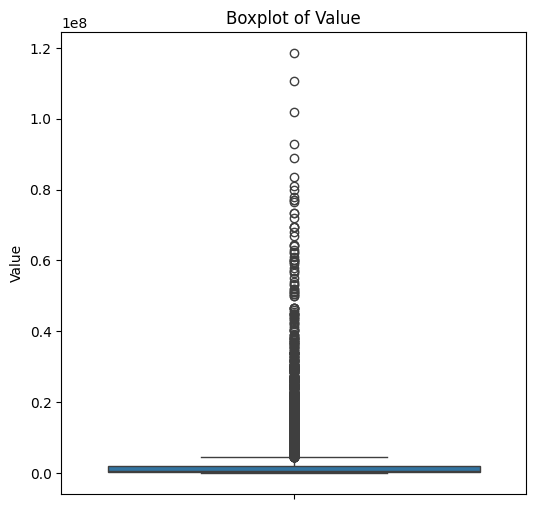

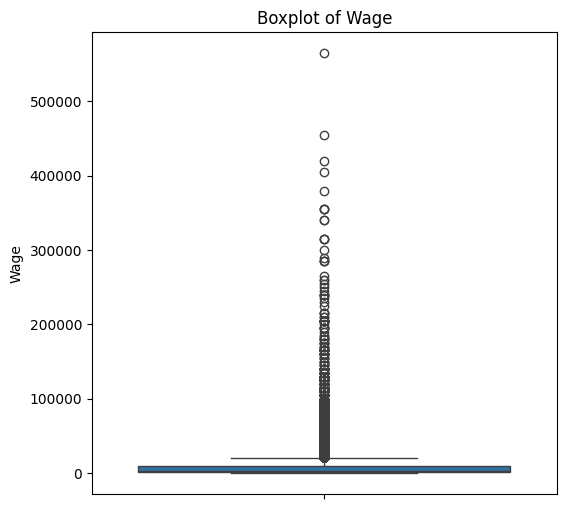

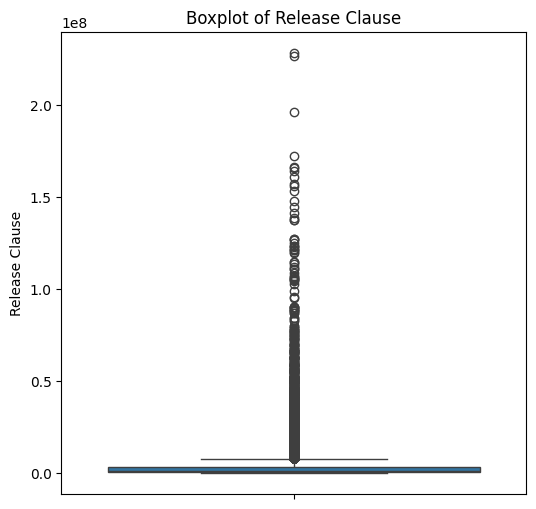

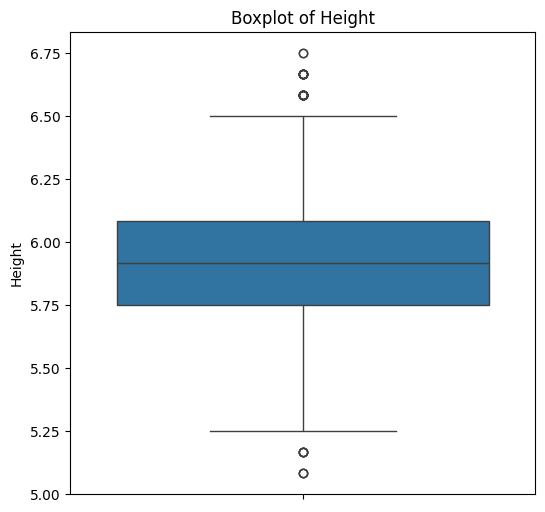

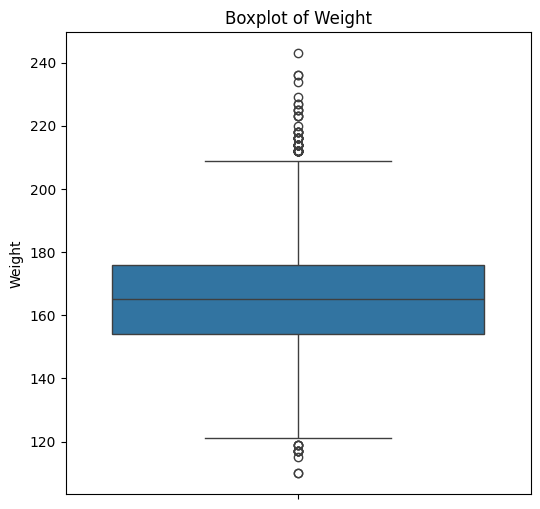

In [52]:
# Create a boxplot for each column in boxplt
for column in boxplt:
    plt.figure(figsize=(6, 6))
    sns.boxplot(y=df_glcvu[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [47]:
# Create a copy of df_glcvu
df_glimpute = df_glcvu.copy()

# Calculate and print the percentage of missing values in each column
for column in columns:
    missing = df_glimpute[column].isnull().sum()
    percent_missing = (missing / len(df_glimpute)) * 100
    print(f"{column}: {percent_missing:.2f}% missing")

# Create imputers
num_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent') # not used as throwing error

# Impute numerical columns
num_columns = ["Value", "Wage", "Release Clause", "Height", "Weight"]
df_glimpute[num_columns] = num_imputer.fit_transform(df_glimpute[num_columns])

# Convert 'Joined' and 'Contract Valid Until' to datetime
df_glimpute['Joined'] = pd.to_datetime(df_glimpute['Joined'])
df_glimpute['Contract Valid Until'] = pd.to_datetime(df_glimpute['Contract Valid Until'])

# Fill missing values in 'Joined' and 'Contract Valid Until' with the mode
df_glimpute['Joined'].fillna(df_glimpute['Joined'].mode()[0], inplace=True)
df_glimpute['Contract Valid Until'].fillna(df_glimpute['Contract Valid Until'].mode()[0], inplace=True)

Value: 0.00% missing
Wage: 0.00% missing
Release Clause: 8.59% missing
Joined: 0.00% missing
Contract Valid Until: 1.59% missing
Height: 0.26% missing
Weight: 0.26% missing


In [48]:
# List of columns to check
columns = ["Value", "Wage", "Release Clause", "Joined", "Contract Valid Until", "Height", "Weight"]
df_glimpute[columns]


,Value,Wage,Release Clause,Joined,Contract Valid Until,Height,Weight
0,110500000.0,565000.0,226500000.0,1970-01-01 00:00:00.000002004,2021-01-01 12:00:00,5.583333,159.0
1,77000000.0,405000.0,127100000.0,1970-01-01 00:00:00.000002018,2022-01-01 12:00:00,6.166667,183.0
2,118500000.0,290000.0,228100000.0,1970-01-01 00:00:00.000002017,2022-01-01 12:00:00,5.750000,150.0
3,72000000.0,260000.0,138600000.0,1970-01-01 00:00:00.000002011,2020-01-01 12:00:00,6.333333,168.0
4,102000000.0,355000.0,196400000.0,1970-01-01 00:00:00.000002015,2023-01-01 12:00:00,5.916667,154.0
...,...,...,...,...,...,...,...
18202,60000.0,1000.0,143000.0,1970-01-01 00:00:00.000002017,2019-01-01 12:00:00,5.750000,134.0
18203,60000.0,1000.0,113000.0,1970-01-01 00:00:00.000002018,2020-01-01 12:00:00,6.250000,170.0
18204,60000.0,1000.0,165000.0,1970-01-01 00:00:00.000002017,2021-01-01 12:00:00,5.666667,148.0
18205,60000.0,1000.0,143000.0,1970-01-01 00:00:00.000002018,2019-01-01 12:00:00,5.833333,154.0


In [49]:
# Extract the year and convert to integer
df_glimpute['Joined'] = df_glimpute['Joined'].dt.year.astype(int)

# Check the new datatype
new_data_type = df_glimpute['Joined'].dtype
print(f"New data type of 'Joined': {new_data_type}")

New data type of 'Joined': int32


In [50]:
df_glimpute[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Value                 18207 non-null  float64       
 1   Wage                  18207 non-null  float64       
 2   Release Clause        18207 non-null  float64       
 3   Joined                18207 non-null  int32         
 4   Contract Valid Until  18207 non-null  datetime64[ns]
 5   Height                18207 non-null  float64       
 6   Weight                18207 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 924.7 KB


In [51]:
print("Information about the DataFrame:")
print(df_glimpute[columns].info())

print("\nNumber of null entries in each column:")
print(df_glimpute[columns].isnull().sum())

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Value                 18207 non-null  float64       
 1   Wage                  18207 non-null  float64       
 2   Release Clause        18207 non-null  float64       
 3   Joined                18207 non-null  int32         
 4   Contract Valid Until  18207 non-null  datetime64[ns]
 5   Height                18207 non-null  float64       
 6   Weight                18207 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 924.7 KB
None

Number of null entries in each column:
Value                   0
Wage                    0
Release Clause          0
Joined                  0
Contract Valid Until    0
Height                  0
Weight                  0
dtype: int64


In [52]:
df_glimpute.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [53]:
df_glimpute[columns].head(2)

,Value,Wage,Release Clause,Joined,Contract Valid Until,Height,Weight
0,110500000.0,565000.0,226500000.0,1970,2021-01-01 12:00:00,5.583333,159.0
1,77000000.0,405000.0,127100000.0,1970,2022-01-01 12:00:00,6.166667,183.0


In [54]:
df_glcvu[columns].head(2)

,Value,Wage,Release Clause,Joined,Contract Valid Until,Height,Weight
0,110500000.0,565000.0,226500000.0,2004,2021-01-01 12:00:00,5.583333,159.0
1,77000000.0,405000.0,127100000.0,2018,2022-01-01 12:00:00,6.166667,183.0


In [56]:
df_gl[columns].head(2)

,Value,Wage,Release Clause,Joined,Contract Valid Until,Height,Weight
0,110500000.0,565000.0,226500000.0,2004,2021,5'7,159lbs
1,77000000.0,405000.0,127100000.0,2018,2022,6'2,183lbs


In [57]:
df_gl = df_glimpute.copy()
# This command copies the DataFrame df_glimpute to df_gl

In [58]:
df_gl[columns].head(2)

,Value,Wage,Release Clause,Joined,Contract Valid Until,Height,Weight
0,110500000.0,565000.0,226500000.0,1970,2021-01-01 12:00:00,5.583333,159.0
1,77000000.0,405000.0,127100000.0,1970,2022-01-01 12:00:00,6.166667,183.0


## Exploratory Data Analysis
### T10 - Plot the distribution of Overall rating for all the players and write your findings.

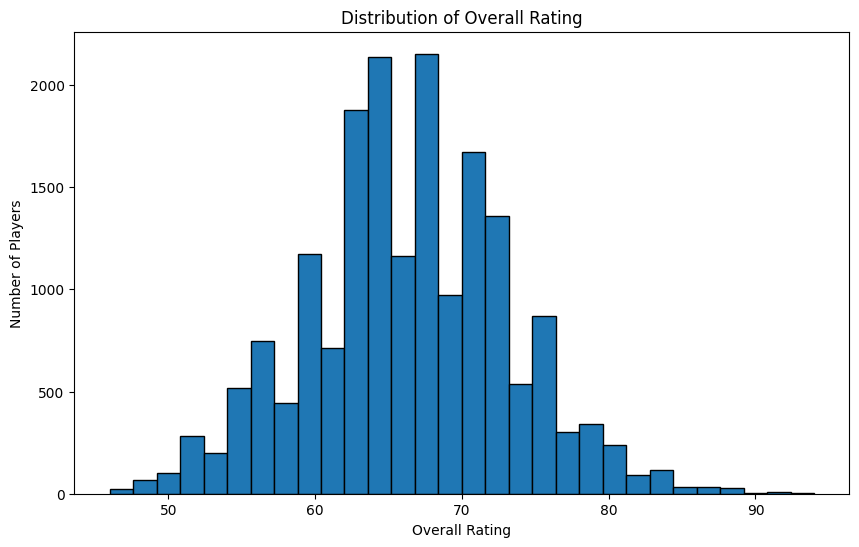

In [59]:

plt.figure(figsize=(10, 6))
plt.hist(df_gl['Overall'], bins=30, edgecolor='black')
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.show()

# 1. **Central tendency**: The tendency of data to be around a central value. The three measures of central tendency are the mean, median, and mode. The mean is the average of the data, the median is the middle value of the data, and the mode is the value that appears most frequently in the data. The mean is the most commonly used measure of central tendency. However, the mean can be affected by outliers, so the median is often used as well. The mode is used when the data is categorical. Here the Central Tendency is the mean of the data as it is a continuous variable and the data is normally distributed. The Mean is 66.24. The median is 66.0. The mode is 66.0. The mean and median are close to each other, so the data is not affected by outliers.

# 2. **Dispersion**: The spread of the data. The measures of dispersion are the range, variance, standard deviation, and interquartile range. The range is the difference between the maximum and minimum values of the data. The variance is the average of the squared differences from the mean. The standard deviation is the square root of the variance. The interquartile range is the difference between the third quartile and the first quartile. Here the Dispersion is the standard deviation of the data as it is a continuous variable and the data is normally distributed. The standard deviation is 6.91.

# 3. **Skewness**: The measure of the asymmetry of the data. A normal distribution has a skewness of 0. A positive skewness means the data is skewed to the right, and a negative skewness means the data is skewed to the left. Here the Skewness is 0.067. The data is slightly skewed to the right.

# 5. **Outliers**: The data points that are significantly different from the rest of the data. Outliers can affect the mean, so it is important to identify and remove them. Here the outliers are present in the data as the data is continuous and normally distributed. The outliers can be identified using the boxplot. The boxplot shows the outliers as the points outside the whiskers of the boxplot.

# 6. **Shape**: The shape of the data. The shape of the data can be symmetric, skewed, or uniform. Here the shape of the data is symmetric as the skewness is close to 0.

# 7. **Modality**: The number of peaks in the data. The data can be unimodal, bimodal, or multimodal. Here the data is unimodal as there is only one peak in the data.

# 8. **Kurtosis**: The measure of the tailedness of the data. A normal distribution has a kurtosis of 3. A positive kurtosis means the data has heavier tails, and a negative kurtosis means the data has lighter tails. Here the Kurtosis is 0.096. The data has slightly heavier tails.





In [60]:
df_gl['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [ ]:
""" import seaborn as sns
sns.distplot(df_gl['Overall']) """

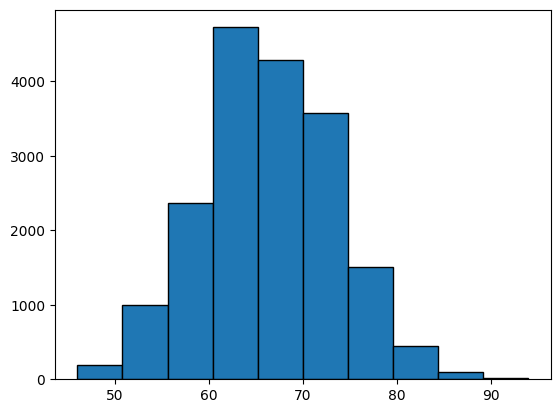

In [61]:

plt.hist(df_gl['Overall'], bins=10, edgecolor='black')
plt.show()

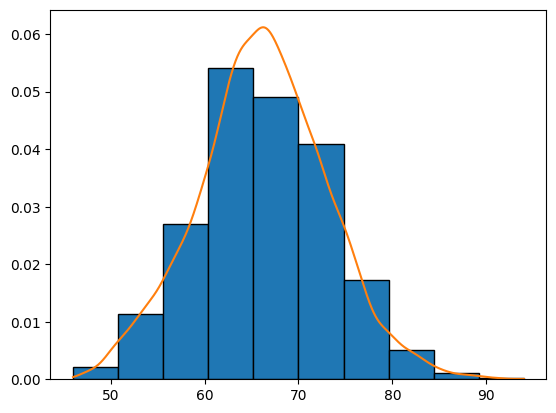

In [62]:

data = df_gl['Overall']
density = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 1000)

plt.hist(data, bins=10, edgecolor='black', density=True)
plt.plot(x_vals, density(x_vals))
plt.show()

C:\Users\nhari\AppData\Local\Temp\ipykernel_11472\3336477113.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gl['Overall'])


<Axes: xlabel='Overall', ylabel='Density'>

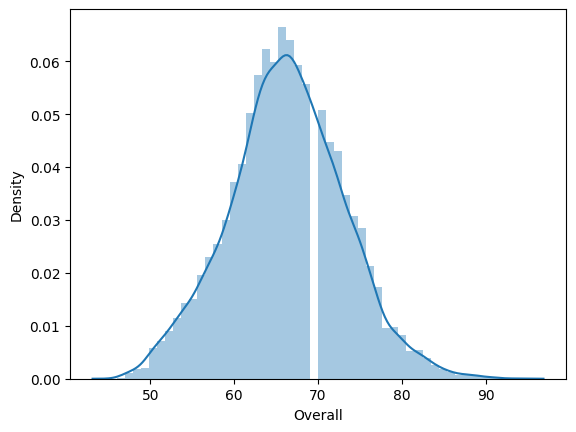

In [63]:
sns.distplot(df_gl['Overall'])

<Axes: xlabel='Overall', ylabel='Count'>

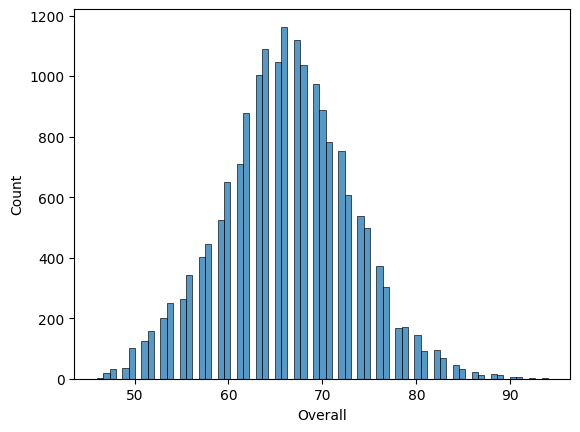

In [64]:
sns.histplot(df_gl['Overall'])

In [65]:
print("Skewness: %f" % df_gl['Overall'].skew())
print("Kurtosis: %f" % df_gl['Overall'].kurt())

Skewness: 0.067185
Kurtosis: 0.096569


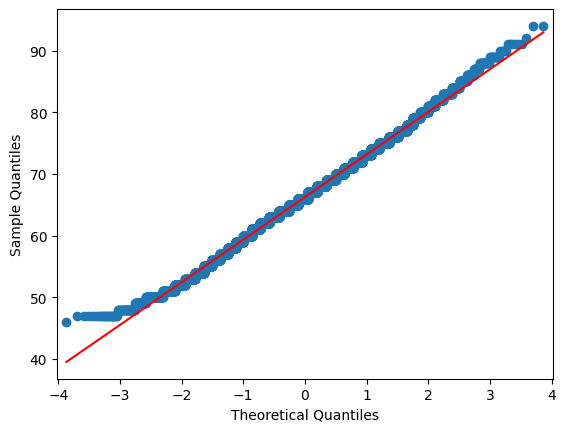

In [66]:
import statsmodels.api as sm
sm.qqplot(df_gl['Overall'], line='s')
plt.show()
# The data is normally distributed as the points are close to the line.

In [108]:
""" import sys
print(sys.executable) """

c:\Users\nhari\anaconda3\python.exe


### T11 - Retrieve the names of top20 players based on the Overall rating.

In [67]:
print(df_gl.nlargest(20, 'Overall')['Name'].tolist())

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne', 'E. Hazard', 'L. Modrić', 'L. Suárez', 'Sergio Ramos', 'J. Oblak', 'R. Lewandowski', 'T. Kroos', 'D. Godín', 'David Silva', 'N. Kanté', 'P. Dybala', 'H. Kane', 'A. Griezmann', 'M. ter Stegen', 'T. Courtois']


### T12 - Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating

In [68]:
# Select the top 20 players based on 'Overall' rating
top_20_players = df_gl.nlargest(20, 'Overall')

print(top_20_players)

                 Name  Age Nationality  Overall  Potential  \
0            L. Messi   31   Argentina       94         94   
1   Cristiano Ronaldo   33    Portugal       94         94   
2           Neymar Jr   26      Brazil       92         93   
3              De Gea   27       Spain       91         93   
4        K. De Bruyne   27     Belgium       91         92   
5           E. Hazard   27     Belgium       91         91   
6           L. Modrić   32     Croatia       91         91   
7           L. Suárez   31     Uruguay       91         91   
8        Sergio Ramos   32       Spain       91         91   
9            J. Oblak   25    Slovenia       90         93   
10     R. Lewandowski   29      Poland       90         90   
11           T. Kroos   28     Germany       90         90   
12           D. Godín   32     Uruguay       90         90   
13        David Silva   32       Spain       90         90   
14           N. Kanté   27      France       89         90   
15      

### T13 - What is the average "Age" and "Wage" of these top 20 players? (usethe data frame created in the question#11)

In [69]:
average_age = top_20_players['Age'].mean()
average_wage = top_20_players['Wage'].mean()

print("Average Age of top 20 Players: ", average_age)
print("Average Wage of top 20 Players: ", average_wage)

Average Age of top 20 Players:  28.3
Average Wage of top 20 Players:  289700.0


### T14 - Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage

In [70]:
# Find the player with the highest wage
highest_wage_player = top_20_players.nlargest(1, 'Wage')[['Name', 'Wage']]

print(highest_wage_player)

       Name      Wage
0  L. Messi  565000.0


### T15 - Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'

In [71]:
players_data4col = df_gl[['Name', 'Club', 'Wage', 'Overall']]

print(players_data4col)

                     Name                 Club      Wage  Overall
0                L. Messi         FC Barcelona  565000.0       94
1       Cristiano Ronaldo             Juventus  405000.0       94
2               Neymar Jr  Paris Saint-Germain  290000.0       92
3                  De Gea    Manchester United  260000.0       91
4            K. De Bruyne      Manchester City  355000.0       91
...                   ...                  ...       ...      ...
18202        J. Lundstram      Crewe Alexandra    1000.0       47
18203  N. Christoffersson       Trelleborgs FF    1000.0       47
18204           B. Worman     Cambridge United    1000.0       47
18205      D. Walker-Rice      Tranmere Rovers    1000.0       47
18206           G. Nugent      Tranmere Rovers    1000.0       46

[18207 rows x 4 columns]


### T15i - find the average Overall rating for each club.

In [72]:
average_overall_by_club = players_data4col.groupby('Club')['Overall'].mean()

print(average_overall_by_club)

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64


In [73]:
average_overall_by_club = players_data4col.groupby('Club')['Overall'].mean().sort_values(ascending=False)

print(average_overall_by_club)

Club
Juventus          82.280000
Napoli            80.000000
Inter             79.750000
Real Madrid       78.242424
Milan             78.074074
                    ...    
Sligo Rovers      56.631579
Derry City        55.777778
Bohemian FC       55.000000
Limerick FC       54.526316
Bray Wanderers    53.652174
Name: Overall, Length: 651, dtype: float64


### T15ii - Display the average overall rating of Top10 Clubs using a plot

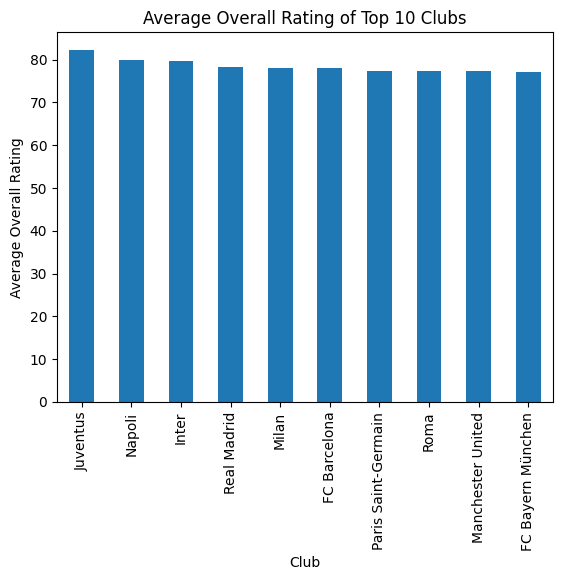

In [74]:

# Calculate the average overall rating for each club
average_overall_by_club = players_data4col.groupby('Club')['Overall'].mean()

# Select the top 10 clubs
top_10_clubs = average_overall_by_club.nlargest(10)

# Plot the results
top_10_clubs.plot(kind='bar')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating of Top 10 Clubs')
plt.show()

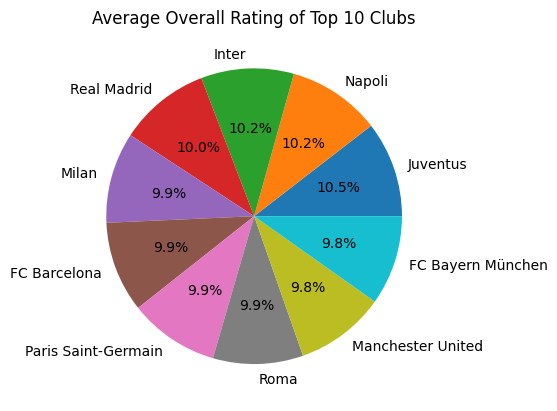

In [75]:
top_10_clubs.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # This removes 'Overall' from the y-axis
plt.title('Average Overall Rating of Top 10 Clubs')
plt.show()

In [76]:

fig = px.pie(top_10_clubs.reset_index(), values='Overall', names='Club', title='Average Overall Rating of Top 10 Clubs')
fig.update_traces(textinfo='percent', hoverinfo='label+percent+name')
fig.update_layout(
    autosize=False,
    width=800,  
    height=500,  
)
fig.show()

### T16 - What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same.

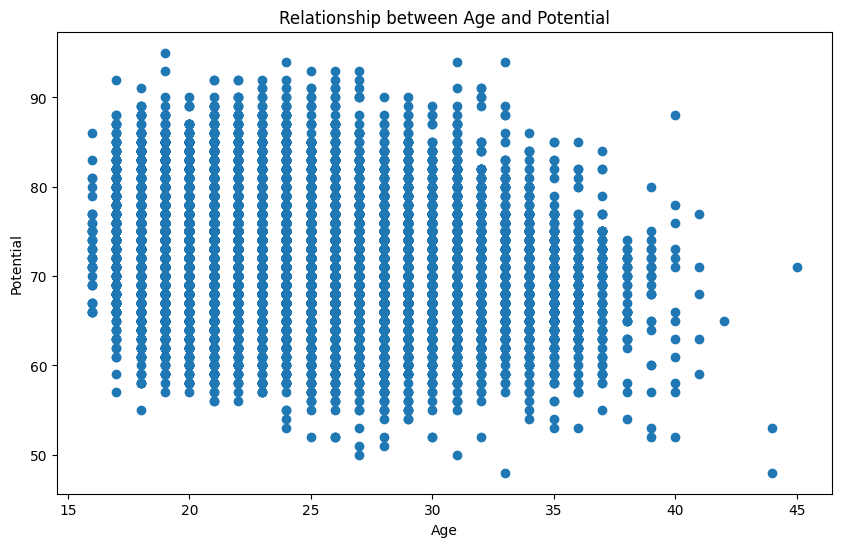

In [77]:

plt.figure(figsize=(10, 6))
plt.scatter(df_gl['Age'], df_gl['Potential'])
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('Relationship between Age and Potential')
plt.show()

# The Plot shows that the potential of the players decreases with age. The players with higher potential are younger. The players with the highest potential are around 20 years old. The potential of the players decreases after the age of 35+.

In [78]:

fig = px.scatter(df_gl, x='Age', y='Potential', hover_data=['Name', 'Club'])
fig.update_layout(title='Relationship between Age and Potential', xaxis_title='Age', yaxis_title='Potential')
fig.show()

# The Plot shows that the potential of the players decreases with age. The players with higher potential are younger. The players with the highest potential are around 20 years old. The potential of the players decreases after the age of 35+. 

In [79]:
correlation = df_gl['Age'].corr(df_gl['Potential'])
print(correlation)
# infers that the correlation between Age and Potential is -0.253312 and it is a negative correlation. The correlation is weak as the value is close to 0 which means that the Age and Potential are not strongly related ie. as the age increases the potential decreases.

-0.2533121074109556


In [80]:
import statsmodels.api as sm

X = sm.add_constant(df_gl['Age']) # adding a constant
model = sm.OLS(df_gl['Potential'], X).fit()
print(model.summary())

# 'Potential' is the dependent variable (also known as the target variable), and 'Age' is the independent variable (also known as the predictor variable). The model is trying to predict or explain the 'Potential' based on 'Age'. The negative coefficient for 'Age' suggests that as 'Age' increases, 'Potential' tends to decrease, all else being equal.

                            OLS Regression Results                            
Dep. Variable:              Potential   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1248.
Date:                Thu, 08 Feb 2024   Prob (F-statistic):          1.59e-264
Time:                        17:40:46   Log-Likelihood:                -58263.
No. Observations:               18207   AIC:                         1.165e+05
Df Residuals:                   18205   BIC:                         1.165e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6695      0.241    330.937      0.0

<Axes: >

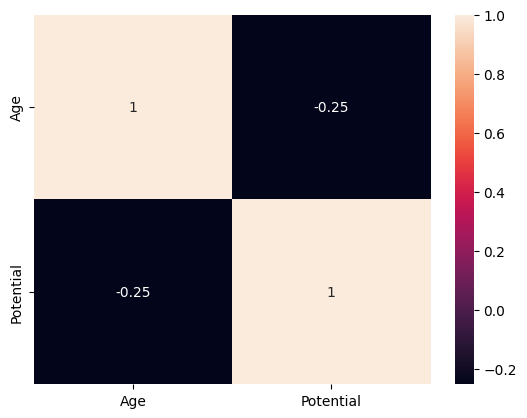

In [81]:
import seaborn as sns

correlation_matrix = df_gl[['Age', 'Potential']].corr()
sns.heatmap(correlation_matrix, annot=True)

# The correlation matrix shows that the correlation between 'Age' and 'Potential' is -0.25. The correlation is negative, which means that as 'Age' increases, 'Potential' tends to decrease. The correlation is weak as the value is close to 0. 

### T17 - Which features directly contribute to the wages of the players? Support your answer with a plot and a metric

In [ ]:
""" 
# Convert all columns to numeric where possible
df_gl_numeric = df_gl.apply(pd.to_numeric, errors='coerce')

# Selecting numerical columns for correlation analysis
numerical_features = df_gl_numeric.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
correlation_matrix = numerical_features.corr()

# Sorting correlation values with respect to 'Wage'
correlation_wage = correlation_matrix['Wage'].sort_values(ascending=False)

# Plotting the correlation values
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_wage.drop('Wage'), y=correlation_wage.drop('Wage').index, palette='coolwarm')
plt.title('Correlation with Player Wages')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

print(correlation_wage)
 """

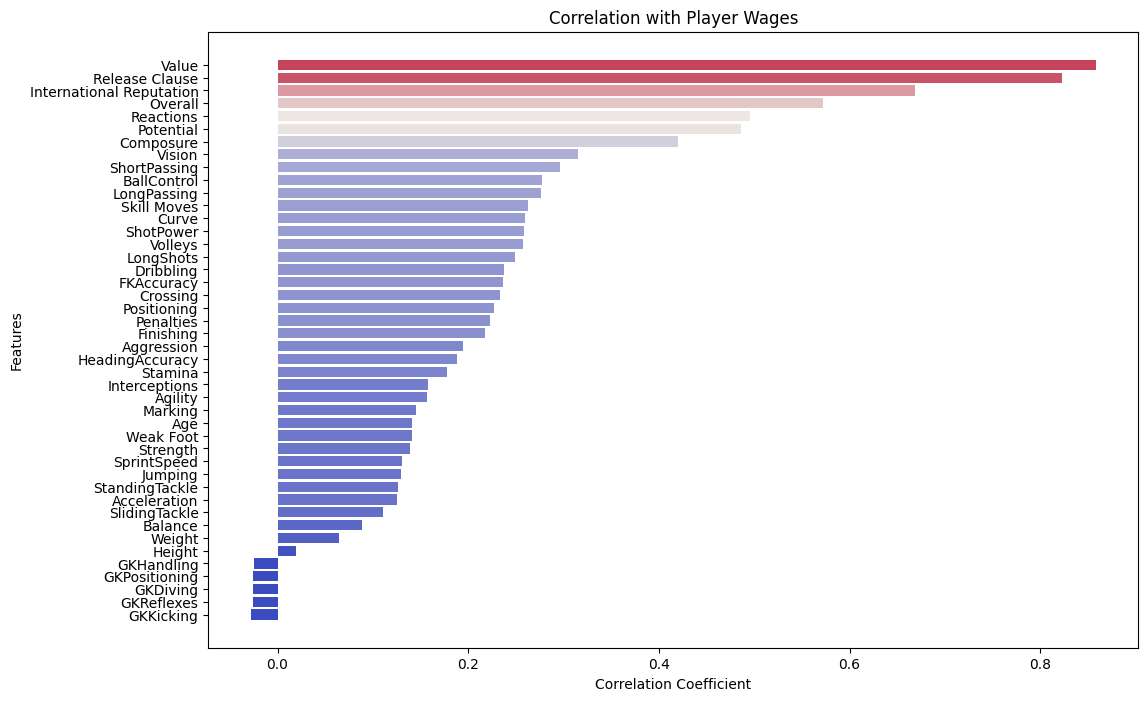

Wage                        1.000000
Value                       0.858442
Release Clause              0.823151
International Reputation    0.668635
Overall                     0.571926
Reactions                   0.495560
Potential                   0.486413
Composure                   0.419597
Vision                      0.315395
ShortPassing                0.296691
BallControl                 0.277615
LongPassing                 0.276762
Skill Moves                 0.263205
Curve                       0.259550
ShotPower                   0.258351
Volleys                     0.257357
LongShots                   0.249084
Dribbling                   0.237150
FKAccuracy                  0.236385
Crossing                    0.232834
Positioning                 0.226775
Penalties                   0.222440
Finishing                   0.217439
Aggression                  0.194581
HeadingAccuracy             0.187967
Stamina                     0.177562
Interceptions               0.157415
A

In [82]:
import matplotlib.colors as mcolors

# Selecting numerical columns for correlation analysis
numerical_features = df_gl.select_dtypes(include=['int64', 'float'])

# Calculating correlation matrix
correlation_matrix = numerical_features.corr()

# Sorting correlation values with respect to 'Wage'
correlation_wage = correlation_matrix['Wage'].sort_values(ascending=False)

# Creating a colormap similar to 'coolwarm' in seaborn
cmap = mcolors.LinearSegmentedColormap.from_list("n",['#3b4cc0', '#efe8e2', '#b40426'])

# Plotting the correlation values
plt.figure(figsize=(12, 8))
plt.barh(correlation_wage.drop('Wage').index, correlation_wage.drop('Wage'), color=cmap(correlation_wage.drop('Wage')))
plt.title('Correlation with Player Wages')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the highest correlation at the top
plt.show()

print(correlation_wage)

# The plot shows the correlation of the features with the player wages. The features with the highest positive correlation with the player wages are 'Value', 'Release Clause', 'International Reputation', 'Overall', 'Potential' etc.. The features with the highest negative correlation with the player wages are 'Age', GKHandling, GkPositioning, GKDiving, GKReflexes, GKKicking etc.

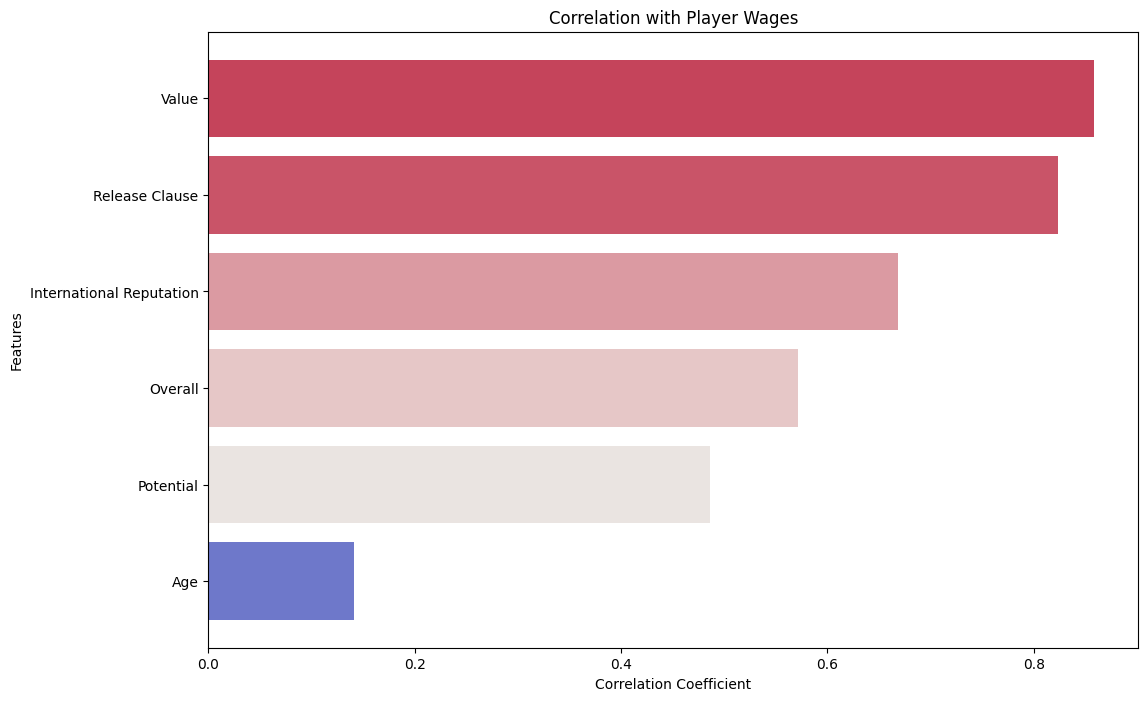

Wage                        1.000000
Value                       0.858442
Release Clause              0.823151
International Reputation    0.668635
Overall                     0.571926
Potential                   0.486413
Age                         0.141145
Name: Wage, dtype: float64


In [83]:
import matplotlib.colors as mcolors

# Selecting specified numerical columns for correlation analysis
selected_features = ['Age', 'Overall', 'Potential', 'Value', 'International Reputation', 
                     'Release Clause', 'Wage']

numerical_features = df_gl[selected_features]

# Calculating correlation matrix
correlation_matrix = numerical_features.corr()

# Sorting correlation values with respect to 'Wage'
correlation_wage = correlation_matrix['Wage'].sort_values(ascending=False)

# Creating a colormap similar to 'coolwarm' in seaborn
cmap = mcolors.LinearSegmentedColormap.from_list("n",['#3b4cc0', '#efe8e2', '#b40426'])

# Plotting the correlation values
plt.figure(figsize=(12, 8))
plt.barh(correlation_wage.drop('Wage').index, correlation_wage.drop('Wage'), color=cmap(correlation_wage.drop('Wage')))
plt.title('Correlation with Player Wages')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the highest correlation at the top
plt.show()

# print(correlation_wage.head(10))
print(correlation_wage)




### T18 - Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot.

The position with the maximum number of players is ST
The position with the minimum number of players is LF


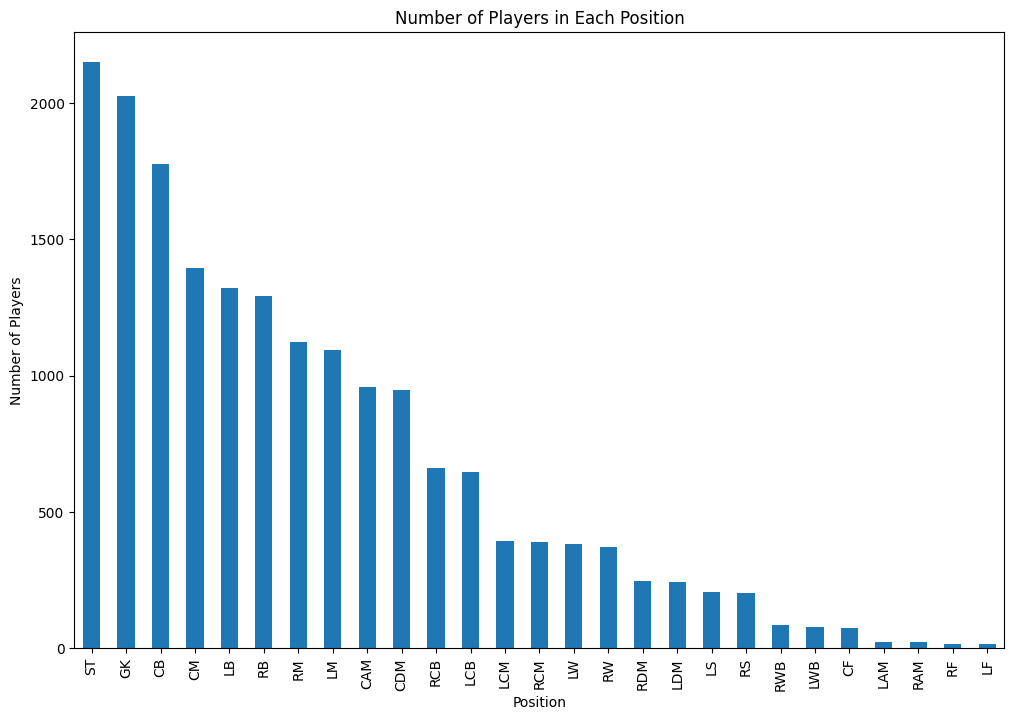

In [84]:

# Count the number of players in each position
position_counts = df_gl['Position'].value_counts()

# Find the position with the maximum and minimum number of players
max_position = position_counts.idxmax()
min_position = position_counts.idxmin()

print(f"The position with the maximum number of players is {max_position}")
print(f"The position with the minimum number of players is {min_position}")

# Plot the number of players in each position
plt.figure(figsize=(12, 8))
position_counts.plot(kind='bar')
plt.title('Number of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()

In [86]:

# Count the number of players in each position
position_counts = df_gl['Position'].value_counts()

# Find the position with the maximum and minimum number of players
max_position = position_counts.idxmax()
min_position = position_counts.idxmin()

print(f"The position with the maximum number of players is {max_position}")
print(f"The position with the minimum number of players is {min_position}")

# Create a pie chart with hover text
fig = go.Figure(data=[go.Pie(labels=position_counts.index, 
                             values=position_counts, 
                             hoverinfo='label+percent', 
                             textinfo='value', 
                             textfont_size=20,
                             marker=dict(line=dict(color='#000000', width=2)))])
fig.update_layout(title_text="Proportion of Players in Each Position",
                  height=600)

fig.show()

The position with the maximum number of players is ST
The position with the minimum number of players is LF


### T19 - How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [87]:
# Filter the DataFrame for players from 'Juventus' with a wage greater than 200K
juventus_players = df_gl[(df_gl['Club'] == 'Juventus') & (df_gl['Wage'] > 200000)]

# Print the number of such players
print(f"There are {len(juventus_players)} players from Juventus with a wage greater than 200K.")

# Display all the information of such players
juventus_players

There are 3 players from Juventus with a wage greater than 200K.


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,3.0,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


### T20 - Generate a data frame containing top 5 players by Overall rating for each unique position.

In [88]:
# Function to select the top 5 players by Overall rating
def top_5_players(group):
    return group.sort_values('Overall', ascending=False).head(5)

# Apply the function to each group
top_players = df_gl.groupby('Position').apply(top_5_players)

# Reset the index for a cleaner look
top_players.reset_index(drop=True, inplace=True)

# Display the DataFrame
top_players

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,4.0,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
1,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
2,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,3.0,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
3,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,4.0,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
4,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,4.0,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
131,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,4.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
132,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,3.0,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
133,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,4.0,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0


In [89]:
# Function to select the top 5 players by Overall rating
def top_5_players(group):
    return group.sort_values('Overall', ascending=False).head(5)

# Apply the function to each group
top_players = df_gl.groupby('Position').apply(top_5_players)

# Reset the index for a cleaner look
top_players.reset_index(drop=True, inplace=True)

# Select the first 10 columns and the 'Position' column
columns = list(top_players.columns[:10]) + ['Position']

# Select these columns from the DataFrame
selected_top_players = top_players[columns]

# Display the DataFrame
selected_top_players

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position
0,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,4.0,CAM
1,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,CAM
2,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,3.0,CAM
3,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,4.0,CAM
4,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,4.0,CAM
...,...,...,...,...,...,...,...,...,...,...,...
130,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,ST
131,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,4.0,ST
132,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,3.0,ST
133,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,4.0,ST


In [90]:
# Function to select the top 5 players by Overall rating for a specific position
def top_5_players(df, position):
    # Filter the DataFrame for the specified position
    df_position = df[df['Position'] == position]
    
    # Sort by 'Overall' and select the top 5
    top_players = df_position.sort_values('Overall', ascending=False).head(5)
    
    return top_players

# Use the function to get the top 5 players for a specific position
position = 'ST'  # Replace with the desired position
top_players = top_5_players(df_gl, position)

# Display the DataFrame
top_players

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
10,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,4.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
16,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,3.0,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
23,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,4.0,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0
36,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0,Left,4.0,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,123000000.0


In [91]:
# Function to select the top 5 players by Overall rating for a specific position
def top_5_players(df, position):
    # Filter the DataFrame for the specified position
    df_position = df[df['Position'] == position]
    
    # Sort by 'Overall' and select the top 5
    top_players = df_position.sort_values('Overall', ascending=False).head(5)
    
    return top_players

# Use the function to get the top 5 players for a specific position
position = 'ST'  # Replace with the desired position
top_players = top_5_players(df_gl, position)

# Select the first 10 columns and the 'Position' column
columns = list(top_players.columns[:10]) + ['Position']

# Select these columns from the DataFrame
selected_top_players = top_players[columns]

# Display the DataFrame
selected_top_players

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Position
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,ST
10,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,4.0,ST
16,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,3.0,ST
23,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,4.0,ST
36,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0,Left,4.0,ST


### T21 - What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q19)

In [93]:
# Grouping players by their position
position_groups = juventus_players.groupby('Position')

# Initialize an empty dictionary to store the top 5 players' wages for each position
top_players_wages = {}

# Iterate over each position group
for position, group in position_groups:
    # Select the top 5 players based on their wage
    top_players = group.nlargest(5, 'Wage')
    # Calculate the average wage for the top 5 players in this position
    average_wage = top_players['Wage'].mean()
    # Store the average wage in the dictionary
    top_players_wages[position] = average_wage

# Print the average wage for the top 5 players in every position
for position, avg_wage in top_players_wages.items():
    print(f"Average wage for the top 5 players in position {position}: €{avg_wage:.2f}")


Average wage for the top 5 players in position LCB: €215000.00
Average wage for the top 5 players in position LF: €205000.00
Average wage for the top 5 players in position ST: €405000.00


In [94]:
# Get unique positions in the juventus_players DataFrame
unique_positions = juventus_players['Position'].unique()

# Print unique positions
print("Unique positions in juventus_players:")
for position in unique_positions:
    print(position)


Unique positions in juventus_players:
ST
LF
LCB
